<a href="https://colab.research.google.com/github/sidra3921/stock-price-forecasting-sidra2225165138/blob/main/Week9_Neural_Networks_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📅 Week 9 – Week 9: Neural Networks Basics Semester: BSSE 7th Name: Sidra Roll No 2225165138 Project: Stock Price Forecasting (Apple Dataset) Course: Applied Data Science with AI

In [1]:
# Install kaggle
!pip install kaggle


In [2]:
from google.colab import files
files.upload()   # upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sidra3921","key":"f4d8307c016487c2cba5d1afab7c0df5"}'}

In [3]:
import os, shutil, glob

os.makedirs("/root/.kaggle", exist_ok=True)

for file in glob.glob("kaggle*.json"):
    shutil.move(file, "/root/.kaggle/kaggle.json")

os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("Kaggle setup completed")


Kaggle setup completed


In [4]:
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
!unzip -o 10-year-daily-stock-data-of-apple-2015-to-2025.zip


Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 302MB/s]
Archive:  10-year-daily-stock-data-of-apple-2015-to-2025.zip
  inflating: apple_stock_10years_daywise.xlsx  


In [5]:
import pandas as pd

df = pd.read_excel("apple_stock_10years_daywise.xlsx")

df.head()


,Date,Close,High,Low,Open,Volume
0,2015-04-13,28.33,28.71,28.28,28.67,145460400
1,2015-04-14,28.21,28.43,28.12,28.36,102098400
2,2015-04-15,28.31,28.39,28.14,28.23,115881600
3,2015-04-16,28.18,28.38,28.16,28.20,113476000
4,2015-04-17,27.86,28.17,27.80,28.04,207828000


In [6]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   High    2517 non-null   float64       
 3   Low     2517 non-null   float64       
 4   Open    2517 non-null   float64       
 5   Volume  2517 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


/tmp/ipython-input-1053215200.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [11]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13862.9678 - mae: 96.5835 - val_loss: 15019.4893 - val_mae: 101.2964
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12820.4639 - mae: 91.7821 - val_loss: 12674.9951 - val_mae: 91.2944
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10449.0947 - mae: 80.8124 - val_loss: 7737.7583 - val_mae: 70.0912
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5881.8711 - mae: 60.4906 - val_loss: 2560.2871 - val_mae: 42.4643
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1790.5668 - mae: 34.7663 - val_loss: 852.1037 - val_mae: 22.9511
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 746.3367 - mae: 21.7333 - val_loss: 724.7391 - val_mae: 21.2763
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 640.6713 - mae: 20.4181 - val_loss: 584.9142 - val_mae: 19.1181
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 524.0058 - mae: 18.4324 - val_loss: 457.0922 - val_mae: 16.9116
Epoch 9/5

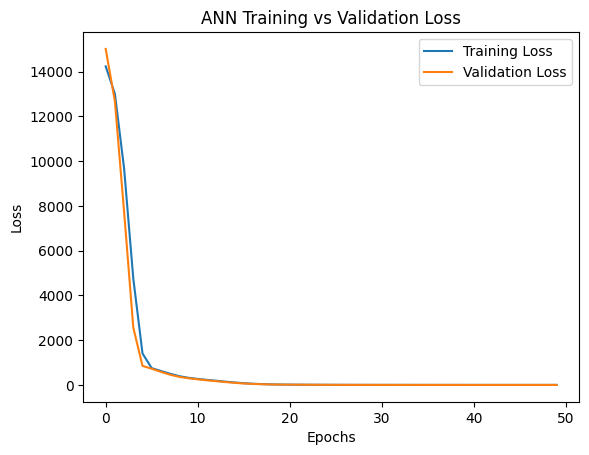

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Training vs Validation Loss')
plt.legend()
plt.show()


In [14]:
y_pred = model.predict(X_test_scaled)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("ANN Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


ANN Performance:
MAE: 1.0120073313940139
RMSE: 1.5865162125317662
R2 Score: 0.9994004293403199


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


Linear Regression:
MAE: 0.5101046526870185
RMSE: 0.8937463161331295
R2: 0.9998097258139852


In [17]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'ANN'],
    'MAE': [mae_lr, mae],
    'RMSE': [rmse_lr, rmse],
    'R2 Score': [r2_lr, r2]
})

comparison


,Model,MAE,RMSE,R2 Score
0,Linear Regression,0.510105,0.893746,0.99981
1,ANN,1.012007,1.586516,0.99940
